## TECHNIQUE 1: BLEND TWO IMAGES

In [32]:
#import all the libraries necessary to combine two images into one

from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [33]:
# Load the two images to be merged
img1 = cv2.imread('/content/landscape1.webp')
img2 = cv2.imread('/content/unicorn.webp')

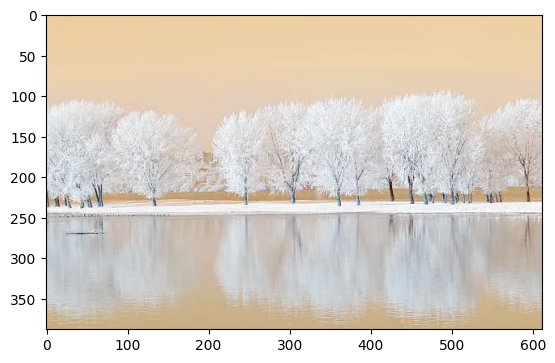

In [34]:
# print the two images
import matplotlib.pyplot as plt

plt.imshow(img1)
plt.show()

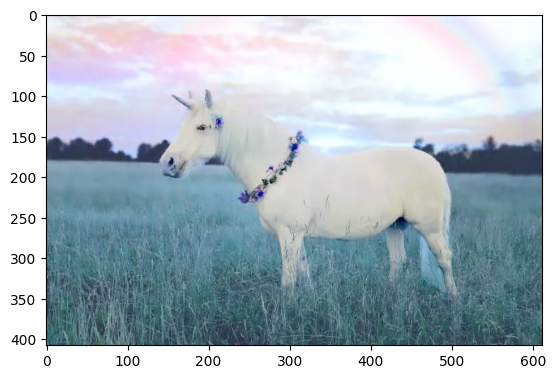

In [35]:
plt.imshow(img2)
plt.show()

In [36]:
# Get the dimensions of the two images
height1, width1, channels1 = img1.shape
height2, width2, channels2 = img2.shape

In [37]:
img1.shape

(388, 612, 3)

In [38]:
img2.shape

(408, 612, 3)

In [39]:
# Make the dimesnaions of both the image same

# Check if the two images have the same dimensions
if img1.shape != img2.shape:
  # If the dimensions are not the same, resize the smaller image to match the larger one
  if img1.shape[0] > img2.shape[0] or img1.shape[1] > img2.shape[1]:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
  else:
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# Print the new dimensions of the images
print(img1.shape)
print(img2.shape)


(408, 612, 3)
(408, 612, 3)


In [40]:
# Resize img2 to match img1
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

In [41]:
# Define the alpha value for blending
alpha = 0.5

In [42]:
# Perform image overlay
overlay = cv2.addWeighted(img1, alpha, img2_resized, 1 - alpha, 0)

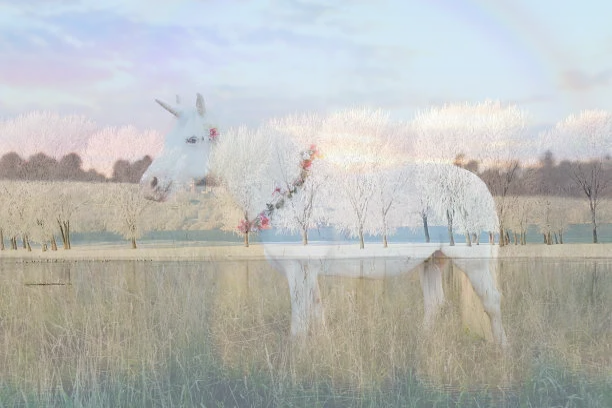

In [43]:
# Display the overlay image
cv2_imshow(overlay)

## TECHNIQUE 2: MASK ONE IMAGE TO ANOTHER

In [44]:
# Load the two images to be merged
img1 = cv2.imread('/content/landscape1.webp')
img2 = cv2.imread('/content/img1.jpg')

In [45]:
# Resize img2 to match img1
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

array([[234, 234, 237, ..., 250, 250, 250],
       [234, 235, 237, ..., 250, 251, 251],
       [234, 234, 237, ..., 250, 251, 251],
       ...,
       [209, 211, 219, ..., 245, 245, 245],
       [204, 206, 214, ..., 245, 245, 245],
       [200, 202, 210, ..., 244, 244, 244]], dtype=uint8)
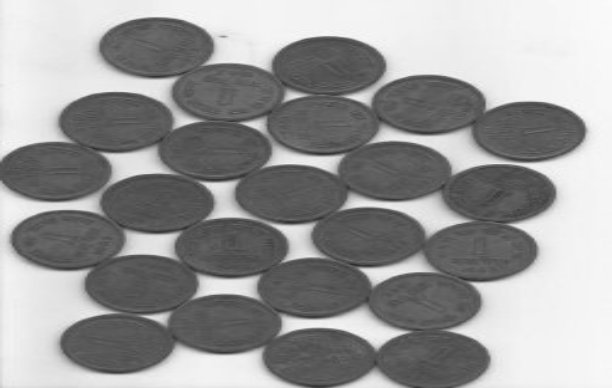

In [47]:
# Convert img2 to grayscale
img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
img2_gray

In [48]:
# Create a mask by thresholding the grayscale image
ret, mask = cv2.threshold(img2_gray, 200, 255, cv2.THRESH_BINARY)

In [49]:
# Invert the mask
mask_inv = cv2.bitwise_not(mask)

In [50]:
# Mask the region of interest from img1 using the inverted mask
img1_bg = cv2.bitwise_and(img1, img1, mask=mask_inv)

In [51]:
# Mask the region of interest from img2 using the original mask
img2_fg = cv2.bitwise_and(img2_resized, img2_resized, mask=mask)

In [52]:
# Combine the masked regions
masked_img = cv2.add(img1_bg, img2_fg)

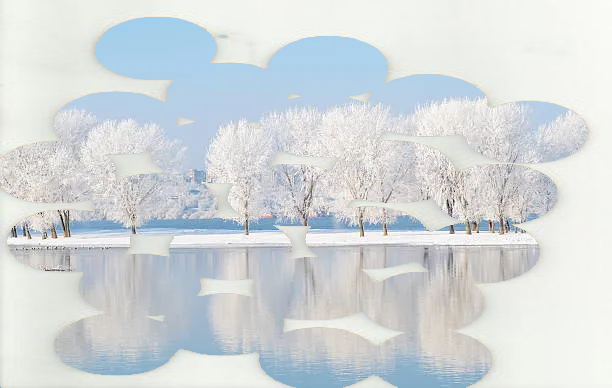

In [53]:
# Display the masked image
cv2_imshow(masked_img)
